# Librerías

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# import plotly.express as px
# import plotly.graph_objects as go
# import matplotlib.pyplot as plt
# import json

# Datos

In [77]:
df = pd.read_csv('../../Data/IPS_Atencion_Capacidad_Transformed.csv')

In [78]:
df

,codigo_sede,num nivel atencion,naturaleza,Ambulancias-Básica,Ambulancias-Medicalizada,Camas-Adultos,Camas-Atención del Parto,Camas-Cuidado Agudo Mental,Camas-Cuidado Intensivo Adulto,Camas-Cuidado Intensivo Neonatal,...,Salas-Procedimientos,Salas-Quirófano,Salas-Sala de Cirugía,Salas-Sala de Radioterapia,Sillas-Otras patologías,Sillas-SPA,Sillas-Salud Mental,Sillas-Sillas de Hemodiálisis,Sillas-Sillas de Quimioterapia,Unidad movil-Unidad Móvil
0,50010001201,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,50010016401,NaN,Privada,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
2,50010025201,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,50010025204,NaN,Privada,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
4,50010029701,NaN,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15542,996240000609,2.0,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15543,997730000607,2.0,Pública,3,0,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15544,997730011401,NaN,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15545,997730013001,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [79]:
df_publicas = df[df['naturaleza'] == 'Pública'].copy()
df_publicas.dropna(inplace=True)
df_publicas['num nivel atencion'] = df_publicas['num nivel atencion'].astype('int64')

In [80]:
df_publicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 79 to 15543
Data columns (total 66 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   codigo_sede                                        3312 non-null   int64 
 1   num nivel atencion                                 3312 non-null   int64 
 2   naturaleza                                         3312 non-null   object
 3   Ambulancias-Básica                                 3312 non-null   int64 
 4   Ambulancias-Medicalizada                           3312 non-null   int64 
 5   Camas-Adultos                                      3312 non-null   int64 
 6   Camas-Atención del Parto                           3312 non-null   int64 
 7   Camas-Cuidado Agudo Mental                         3312 non-null   int64 
 8   Camas-Cuidado Intensivo Adulto                     3312 non-null   int64 
 9   Camas-Cuidado Intensiv

In [81]:
df_publicas

,codigo_sede,num nivel atencion,naturaleza,Ambulancias-Básica,Ambulancias-Medicalizada,Camas-Adultos,Camas-Atención del Parto,Camas-Cuidado Agudo Mental,Camas-Cuidado Intensivo Adulto,Camas-Cuidado Intensivo Neonatal,...,Salas-Procedimientos,Salas-Quirófano,Salas-Sala de Cirugía,Salas-Sala de Radioterapia,Sillas-Otras patologías,Sillas-SPA,Sillas-Salud Mental,Sillas-Sillas de Hemodiálisis,Sillas-Sillas de Quimioterapia,Unidad movil-Unidad Móvil
79,50010214401,3,Pública,0,0,176,0,0,48,10,...,3,8,0,0,0,0,0,0,4,0
87,50010217802,2,Pública,0,2,47,0,0,0,0,...,1,0,3,0,0,0,0,0,0,0
88,50010217804,2,Pública,0,0,43,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
89,50010217807,2,Pública,0,0,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
90,50010217808,2,Pública,24,0,34,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,976660000103,2,Pública,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15536,990010000601,2,Pública,3,0,15,0,0,0,0,...,1,0,2,0,0,0,0,0,0,1
15540,995240000608,2,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15542,996240000609,2,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Desbalanceo

In [82]:
df_publicas.groupby(['num nivel atencion']).agg(count=('codigo_sede', 'count'))

,count
num nivel atencion,
1,2738
2,416
3,158


# Modelo

## X and Y

In [83]:
y = df_publicas['num nivel atencion'].copy()
X = df_publicas[list(df_publicas.columns)[3:]].copy()

## Train - Test Split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2, shuffle=True)

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2318, 63), (994, 63), (2318,), (994,))

## Scale

In [113]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training

In [114]:
clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1)

## Testing

In [115]:
predictions = clf_rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

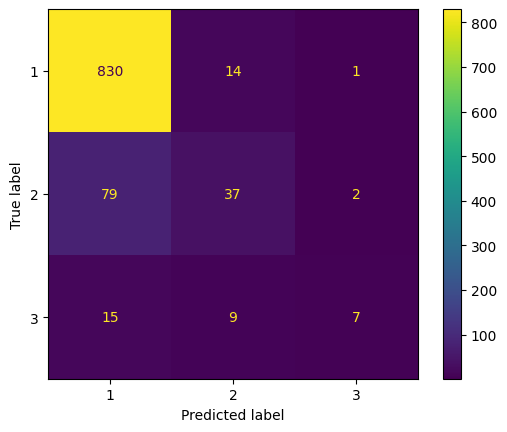

In [116]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()

In [117]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.98      0.94       845
           2       0.62      0.31      0.42       118
           3       0.70      0.23      0.34        31

    accuracy                           0.88       994
   macro avg       0.74      0.51      0.57       994
weighted avg       0.86      0.88      0.86       994



In [118]:
roc_auc_score(y_test, clf_rf.predict_proba(X_test_scaled), multi_class='ovo')

0.7618534610585752

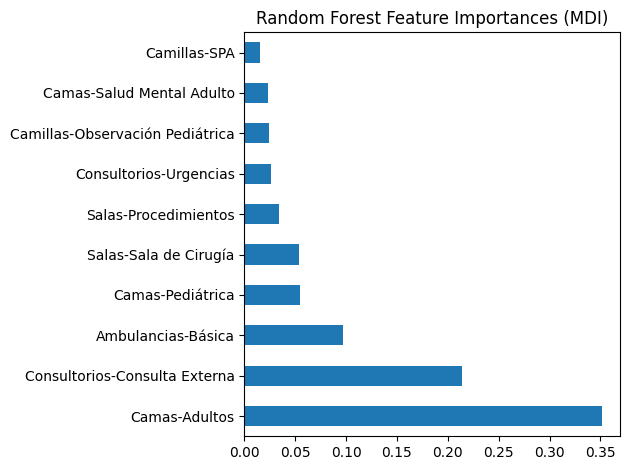

In [119]:
feature_names = list(df_publicas.columns)[3:]

mdi_importances = pd.Series(
    clf_rf[-1].feature_importances_, index=feature_names
).sort_values(ascending=False)
ax = mdi_importances.head(10).plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

## GridSearchCV

In [99]:
param_grid = [
    {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [5, 10, 15, 20, 25, 30],
        'max_features': ['sqrt', 'log2'],        
    }
]

In [100]:
optimal_params = GridSearchCV(
    RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose=3
)

In [101]:
optimal_params.fit(X_train_scaled, y_train)
# print(optimal_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=50;, score=0.805 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=50;, score=0.817 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=50;, score=0.773 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=50;, score=0.838 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=50;, score=0.807 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.804 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.816 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.774 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.828 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.807 total time= 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15, 20, 25, 30],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [50, 100, 200, 500]}],
             scoring='f1_weighted', verbose=3)

In [102]:
optimal_params.best_params_, optimal_params.best_score_

({'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100},
 0.8167042286108817)

## Training

In [120]:
clf_rf = RandomForestClassifier(
    random_state=1,
    max_depth=15,
    max_features='sqrt',
    n_estimators=100)
clf_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=15, random_state=1)

## Testing

In [121]:
predictions = clf_rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

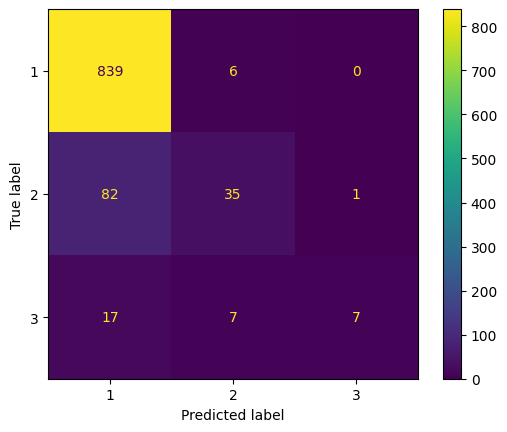

In [122]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()

In [123]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.99      0.94       845
           2       0.73      0.30      0.42       118
           3       0.88      0.23      0.36        31

    accuracy                           0.89       994
   macro avg       0.83      0.51      0.57       994
weighted avg       0.87      0.89      0.86       994



In [124]:
roc_auc_score(y_test, clf_rf.predict_proba(X_test_scaled), multi_class='ovo')

0.7670123195978014

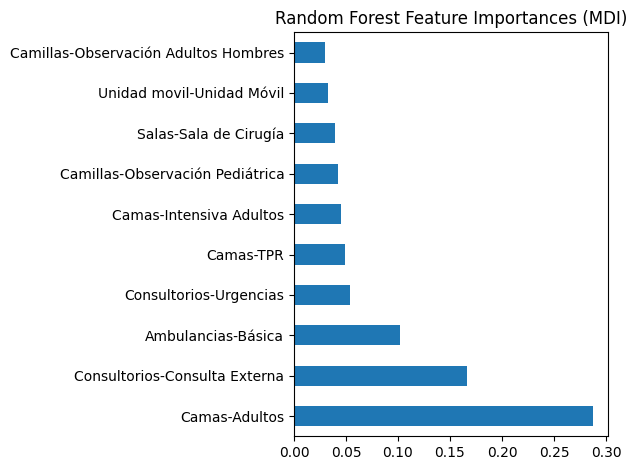

In [110]:
feature_names = list(df_publicas.columns)[3:]

mdi_importances = pd.Series(
    clf_rf[-1].feature_importances_, index=feature_names
).sort_values(ascending=False)
ax = mdi_importances.head(10).plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

## Oversampling

In [92]:
sm = SMOTE(random_state=1)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [65]:
ros = RandomOverSampler(random_state=1)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

In [66]:
X_train_resample.shape, X_test.shape, y_train_resample.shape, y_test.shape

((5715, 63), (994, 63), (5715,), (994,))

In [67]:
counter = Counter(y)
counter1 = Counter(y_train)
counter2 = Counter(y_train_resample)

In [68]:
counter, counter1, counter2

(Counter({1: 2738, 2: 416, 3: 158}),
 Counter({1: 1905, 2: 294, 3: 119}),
 Counter({1: 1905, 2: 1905, 3: 1905}))

## Scale

In [69]:
scaler = StandardScaler()
scaler.fit(X_train_resample)
X_train_scaled = scaler.transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

## Training

In [70]:
clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(X_train_scaled, y_train_resample)

RandomForestClassifier(random_state=1)

## Testing

In [71]:
predictions = clf_rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

### SMOTE

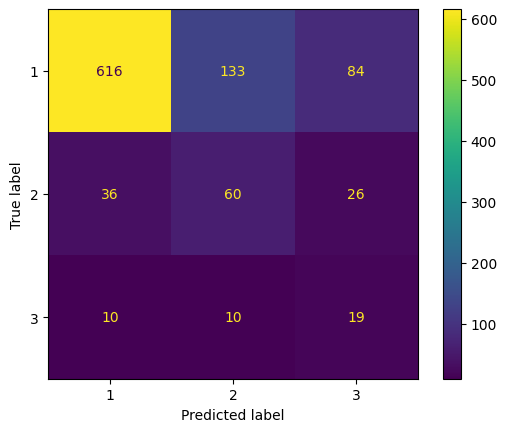

In [99]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()

In [100]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.93      0.74      0.82       833
           2       0.30      0.49      0.37       122
           3       0.15      0.49      0.23        39

    accuracy                           0.70       994
   macro avg       0.46      0.57      0.47       994
weighted avg       0.82      0.70      0.74       994



In [101]:
roc_auc_score(y_test, clf_rf.predict_proba(X_test_scaled), multi_class='ovo')

0.7497273814948427

### Random Over Sampling

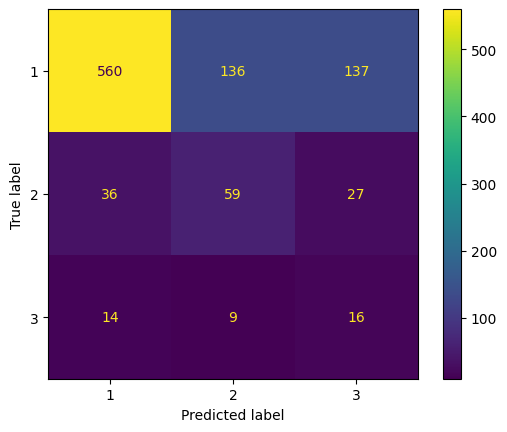

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      0.67      0.78       833
           2       0.29      0.48      0.36       122
           3       0.09      0.41      0.15        39

    accuracy                           0.64       994
   macro avg       0.43      0.52      0.43       994
weighted avg       0.81      0.64      0.70       994



In [74]:
roc_auc_score(y_test, clf_rf.predict_proba(X_test_scaled), multi_class='ovo')

0.7233076500881984